# Load Packages

In [92]:
from matplotlib import pyplot
from keras.datasets import mnist
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.layers import BatchNormalization
import numpy as np
from sklearn.metrics import accuracy_score

# Part 1: CNN model on Mnist dataset

## Load data

Train: X=(60000, 28, 28, 1), y=(60000,)
Test: X=(10000, 28, 28, 1), y=(10000,)


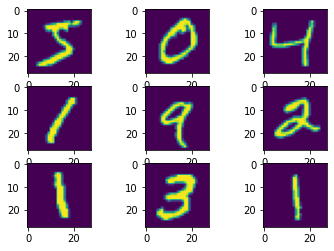

In [71]:
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
trainX = trainX[:,:,:, np.newaxis]
testX = testX[:,:,:, np.newaxis]

# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i])
# show the figure
pyplot.show()

## Convert to onehot vector

In [72]:
trainy_oh = to_categorical(trainy)
testy_oh = to_categorical(testy)
print(train.shape, test.shape)

(60000, 10) (10000, 10)


## Data normalization

In [73]:
# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

## Deep Neural Network 

In [80]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

## Visualize the model

In [87]:
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
flatten_11 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               3211392   
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1290      
Total params: 3,222,250
Trainable params: 3,222,250
Non-trainable params: 0
_________________________________________________________________
None


## Data Preprocessing (Data Augmentation)

In [81]:
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
dg = datagen.flow(train_norm, trainy_oh, batch_size=64)

## Train the NN model 

In [83]:
# fit model
steps = int(train_norm.shape[0] / 64)
history = model.fit_generator(dg, steps_per_epoch=steps, epochs=7, validation_data=(test_norm, testy_oh), verbose=0)

# history = model.fit(train_norm, trainy_oh, epochs=7, validation_data=(test_norm, testy_oh), verbose=1)

Epoch 1/7
1875/1875 [==============================] - 147s 78ms/step - loss: 0.1723 - accuracy: 0.9492 - val_loss: 0.1017 - val_accuracy: 0.9692
Epoch 2/7
1875/1875 [==============================] - 161s 86ms/step - loss: 0.0855 - accuracy: 0.9753 - val_loss: 0.0714 - val_accuracy: 0.9777
Epoch 3/7
1875/1875 [==============================] - 163s 87ms/step - loss: 0.0582 - accuracy: 0.9828 - val_loss: 0.0630 - val_accuracy: 0.9811
Epoch 4/7
1875/1875 [==============================] - 161s 86ms/step - loss: 0.0441 - accuracy: 0.9869 - val_loss: 0.0512 - val_accuracy: 0.9835
Epoch 5/7
1875/1875 [==============================] - 161s 86ms/step - loss: 0.0344 - accuracy: 0.9905 - val_loss: 0.0534 - val_accuracy: 0.9834
Epoch 6/7
1875/1875 [==============================] - 155s 83ms/step - loss: 0.0268 - accuracy: 0.9923 - val_loss: 0.0429 - val_accuracy: 0.9861
Epoch 7/7
1875/1875 [==============================] - 182s 97ms/step - loss: 0.0213 - accuracy: 0.9941 - val_loss: 0.0441 -

## Visualize the Training process

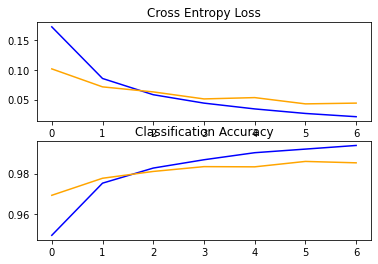

In [84]:
# loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

## Evaluate model on test dataset

In [85]:
_, acc = model.evaluate(testX, testy_oh, verbose=0)
print('> %.3f' % (acc * 100.0))

> 98.570


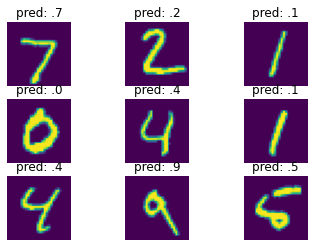

In [132]:
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i , frameon=False)
    pyplot.axis('off')
    # plot raw pixel data
    pyplot.imshow(test_norm[i])
    pyplot.title("pred: ." + str(np.argmax(model.predict(test_norm[i][np.newaxis,:,:,:]))))
    # show the figure
pyplot.show()